In [1]:
print("test")

test


# Configure the model

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model="gemini-2.5-flash")
#output=model.invoke("where is pune located ?")
#print(output.content)

d:\Chetan Pande\AI-ML-2025\agentic-ai-2.0\Langgraph-Agentic\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Config the embedding model

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings=HuggingFaceEmbeddings(model_name="BAAI/bge-large-en-v1.5")
len(embeddings.embed_query("hello"))

1024

In [4]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [5]:
loader=DirectoryLoader("../data2",glob="./*.txt",loader_cls=TextLoader)

In [6]:
docs=loader.load()

In [7]:
docs

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content="🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ra

In [8]:
docs[0].page_content

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hovering around $83,000, which indicates a high standard of living and productivity. In terms of Purchasing Power Parity (PPP), the U.S. ranks second, but nominal GDP is considered more reflective of actual economic size and financial influence.\n\nThe GDP is predominantly driven by the services sector, which contributes more than 77% to the total GDP. This includes industries such as finance, insurance, real estate, healthcare, education, and information technology. The industrial sector (manufacturing, construction, mining) makes up around 19%, while agriculture, although technologically advanced and export-oriented, contributes only about 1%. Despite its small share in GDP, U.S. agriculture is globally significant in terms of productivity and exports.\n\nGDP Growth Trends and Dynamics\nHistorically, the U.S. economy has enjoyed consistent long-term growth, averaging around 2-3% annually. Post-pandemic, the economy bounced back strongly, but 2022 and 2023 saw rising inflation due to supply chain issues and stimulus-driven demand. In 2024, the U.S. GDP grew at a modest pace of around 2.1%, as the Federal Reserve’s interest rate hikes aimed at controlling inflation also moderated economic expansion. Consumer spending, which makes up nearly 70% of GDP, remains a dominant force in economic stability.\n\nThe U.S. maintains its GDP growth through strong innovation, entrepreneurship, and investment in R&D. With companies like Apple, Google, Amazon, Microsoft, and Tesla leading global markets, the U.S. consistently produces high value across sectors, especially in technology and advanced services. Additionally, the economy benefits from intellectual property exports, financial services, and higher education, all of which contribute significantly to GDP through both domestic and international markets.\n\nRole in the Global Economy\nThe U.S. Dollar (USD) is the global reserve currency, held by over 60% of the world’s central bank reserves. This gives the U.S. an enormous advantage in global trade and borrowing. The U.S. is a key member of international institutions like the World Bank, IMF, G7, G20, and WTO, and plays a central role in setting global economic policy.\n\nAs a global innovation hub, the U.S. attracts billions in foreign investment and hosts many of the world's largest and most valuable companies. Its exports include high-tech machinery, aircraft, pharmaceuticals, semiconductors, and financial services, while its imports cover consumer goods, electronics, automobiles, and industrial materials. The trade deficit remains large (around $900 billion in 2024), primarily because the U.S. consumes more than it exports, but its ability to finance this through capital inflows and reserve currency status sustains balance.\n\nKey Economic Strengths\nThe core strength of the U.S. economy lies in its flexible labor market, deep capital markets, technological superiority, and legal system that encourages innovation and property rights. It has a large, highly educated workforce, a diverse immigration pipeline, and access to vast natural resources including oil, gas, coal, and farmland. The presence of top-tier universities and research institutions fuels the knowledge economy, with billions spent annually on R&D—over $700 billion USD, more than any other country.\n\nThe U.S. leads in many critical sectors, including software, biotechnology, aerospace, defense, financial services, and media. Its startup ecosystem, especially in Silicon Valley, produces unicorns and tech giants at a scale unmatched globally. Its financial markets—particularly Wall Street—are the most liquid and globally integrated in the world.\n\nChallenges and Structural Issues\nDespite its strength, the U.S. economy faces several serious long-term issues. The national debt has surpassed $34 trillion USD, raising concerns about fiscal sustainability, especially as interest payments alone are growing rapidly. The income and wealth inequality gap has widened, with a small percentage of Americans owning a disproportionate share of wealth. Access to affordable healthcare, housing shortages, and a declining labor force participation in some sectors are additional structural issues.\n\nAnother growing concern is political polarization, which often stalls crucial economic reforms and budget agreements, as seen in recurrent debt ceiling crises. The U.S. also faces challenges from global competition, especially from China in areas like AI, semiconductors, and green technology. Moreover, climate change, cybersecurity threats, and geopolitical risks (like Ukraine and Taiwan conflicts) add layers of vulnerability to economic planning.\n\nFuture Outlook (2025–2030)\nLooking forward, the U.S. economy is expected to grow at a moderate pace, powered by innovation in AI, green energy, robotics, biotech, and quantum computing. The Biden administration’s Inflation Reduction Act and CHIPS Act are pumping massive investments into semiconductors, clean energy, and infrastructure. There is a strong push for reshoring of manufacturing, especially in critical sectors like chips, pharmaceuticals, and batteries.\n\nHowever, economic leadership will depend on managing the national debt, reforming entitlement programs, upgrading infrastructure, and ensuring the next generation is equipped with digital-age skills. If the U.S. can handle these challenges, it is well-positioned to remain a global economic powerhouse through 2030 and beyond.\n\nFinal Summary\nThe U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global finance, trade, and technology make it the centerpiece of the modern economic system. Yet, rising debt, inequality, political gridlock, and competition from emerging powers demand careful policy navigation. If successfully addressed, the U.S. will continue to dominate the global economy well into the future."


In [9]:
text_splitter=RecursiveCharacterTextSplitter(
chunk_size=200,
chunk_overlap=50
)

In [10]:
new_docs=text_splitter.split_documents(documents=docs)

In [11]:
new_docs

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='innovation, global trade,

In [12]:
doc_string=[doc.page_content for doc in new_docs]

In [13]:
doc_string
len(doc_string)

55

In [14]:
db=Chroma.from_documents(new_docs,embeddings)

In [15]:
retriever=db.as_retriever(search_kwargs={"k": 3})

In [16]:
retriever.invoke("industrial growth of usa?")

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='U.S. GDP – Size, Composition, and Global Share'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='GDP Growth Trends and Dynamics')]

# Creatino of pydantic class


In [17]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [18]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [19]:
from langchain.output_parsers import PydanticOutputParser

In [20]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [21]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

# this below agentstate is just for the explnation like how state works

In [22]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [23]:
state={"messages":["hi"]}

In [24]:
state="hi"

In [25]:
def function_1(state:AgentState):
    
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [USA,Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Topic]}

In [26]:
state={"messages":["what is a today weather?"]}

In [27]:
state={"messages":["what is a GDP of usa??"]}

In [28]:
function_1(state)

Question what is a GDP of usa??
Parsed response: Topic='USA' Reasoning="The user query explicitly asks for information about the 'usa' (GDP of usa), directly falling under the USA category."


{'messages': ['USA']}

In [29]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [30]:
def router(state:AgentState):
    print("-> ROUTER ->")
    
    last_message=state["messages"][-1]
    print("last_message:", last_message)
    
    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [31]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [32]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [33]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [34]:
from langgraph.graph import StateGraph,END

In [35]:
workflow=StateGraph(AgentState)
workflow.add_node("Supervisor",function_1)
workflow.add_node("RAG",function_2)
workflow.add_node("LLM",function_3)
workflow.set_entry_point("Supervisor")

In [36]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [37]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

In [38]:
app=workflow.compile()

In [39]:
state={"messages":["hi"]}

In [40]:
app.invoke(state)

Question hi
Parsed response: Topic='Not Related' Reasoning="The user query 'hi' is a simple greeting and does not contain any keywords or context related to 'USA' or any other specific topic."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


{'messages': ['hi', 'Not Related', 'Hi there! How can I help you today?']}

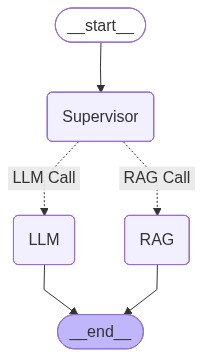

In [41]:
app

In [56]:
state={"messages":["what is a gdp of usa?"]}

In [57]:
app.invoke(state)

Question what is a gdp of usa?
Parsed response: Topic='USA' Reasoning="The user query explicitly asks for information about the 'USA' (Gross Domestic Product of USA), directly aligning with the 'USA' category."
-> ROUTER ->
last_message: USA
-> RAG Call ->


{'messages': ['what is a gdp of usa?',
  'USA',
  "As of 2024, the United States' nominal GDP is estimated to be around $28 trillion USD. This accounts for approximately 25% of the global economy. The U.S. ranks #1 in the world by nominal GDP."]}

In [58]:
state={"messages":["can you tell me the industrial growth of world's most powerful economy?"]}

In [59]:
state={"messages":["can you tell me the industrial growth of world's poor economy?"]}

In [60]:
result=app.invoke(state)

Question can you tell me the industrial growth of world's poor economy?
Parsed response: Topic='Not Related' Reasoning="The user query asks about the 'industrial growth of world's poor economy', which is a global economic topic and does not mention or relate to the USA in any way."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


In [61]:
result["messages"][-1]

'The industrial growth of the world\'s poor economies, often referred to as developing economies, emerging markets, or low- and lower-middle-income countries, is a complex and varied picture, but generally shows a trend of **significant, albeit uneven, progress over the last few decades.**\n\nHere\'s a breakdown based on real-world knowledge:\n\n**1. General Trend: Shift from Agriculture to Industry (and Services)**\n\n*   **Initial Stages:** Many of these economies historically relied heavily on subsistence agriculture. Industrialization marks a crucial step in their economic development.\n*   **Catch-Up Growth:** They often experience higher growth rates in industry compared to developed nations as they "catch up," leveraging lower labor costs, technology transfer, and increasing global integration.\n*   **Value Chain Progression:** This typically starts with basic manufacturing (textiles, apparel, simple assembly), then moves into more complex goods, processing raw materials, and co

'The industrial growth of the world\'s poor economies, often referred to as developing economies, emerging markets, or low- and lower-middle-income countries, is a complex and varied picture, but generally shows a trend of **significant, albeit uneven, progress over the last few decades.**\n\nHere\'s a breakdown based on real-world knowledge:\n\n**1. General Trend: Shift from Agriculture to Industry (and Services)**\n\n*   **Initial Stages:** Many of these economies historically relied heavily on subsistence agriculture. Industrialization marks a crucial step in their economic development.\n*   **Catch-Up Growth:** They often experience higher growth rates in industry compared to developed nations as they "catch up," leveraging lower labor costs, technology transfer, and increasing global integration.\n*   **Value Chain Progression:** This typically starts with basic manufacturing (textiles, apparel, simple assembly), then moves into more complex goods, processing raw materials, and construction.\n\n**2. Key Drivers of Industrial Growth:**\n\n*   **Globalization and Trade:** Increased access to global markets for exports and imports of technology and capital goods. Integration into global supply chains has been a major factor.\n*   **Foreign Direct Investment (FDI):** Multinational corporations invest in these countries to take advantage of lower production costs, access new markets, and utilize natural resources. This brings capital, technology, and management expertise.\n*   **Demographic Dividend:** Many poor economies have young, growing populations, providing a large and often inexpensive labor force for labor-intensive industries.\n*   **Infrastructure Development:** Investments in roads, ports, power generation, and telecommunications, often financed by international loans or foreign aid, facilitate industrial activity.\n*   **Policy Reforms:** Governments in some countries have adopted more market-friendly policies, privatized state-owned enterprises, reduced trade barriers, and improved regulatory environments to attract investment.\n*   **Resource Endowments:** Countries rich in natural resources (oil, gas, minerals) often see growth in extractive industries and related processing.\n\n**3. Challenges and Obstacles:**\n\n*   **Lack of Adequate Infrastructure:** Despite progress, many still suffer from unreliable power, poor transportation networks, and limited access to clean water, which hinders industrial efficiency.\n*   **Human Capital Deficits:** Low levels of education, limited access to vocational training, and poor health outcomes can lead to a shortage of skilled labor and reduce productivity.\n*   **Weak Institutions and Governance:** Corruption, political instability, weak rule of law, and inefficient bureaucracies deter investment and distort markets.\n*   **Access to Finance:** Small and medium-sized enterprises (SMEs), which are crucial for industrial growth, often struggle to access affordable credit.\n*   **Global Competition:** Developing industries face intense competition from established manufacturers in developed and more advanced emerging economies.\n*   **"Middle-Income Trap":** Some economies struggle to transition from low-cost, labor-intensive manufacturing to higher-value-added production and innovation.\n*   **Climate Change:** Disruptions to agriculture and natural resources, as well as extreme weather events, can undermine industrial development.\n*   **Digital Divide:** Lack of access to digital infrastructure and skills can limit participation in the increasingly digital global economy.\n\n**4. Regional Variations:**\n\n*   **Asia (especially Southeast Asia and South Asia):** Has seen the most dynamic industrial growth, with countries like Vietnam, Bangladesh, Cambodia, and India becoming significant players in manufacturing and services. China\'s earlier industrialization also created opportunities for its neighbors.\n*   **Africa:** Industrialization has been slower and more challenging, often dominated by resource extraction. However, some countries (e.g., Ethiopia, Kenya) have made strides in light manufacturing and agro-processing, driven by infrastructure investment and regional integration efforts.\n*   **Latin America:** Industrial growth varies widely. Some countries have strong manufacturing bases but face challenges with competitiveness, commodity dependence, and political volatility.\n\n**5. Recent Trends and Future Outlook:**\n\n*   **Impact of COVID-19:** The pandemic caused significant disruptions to global supply chains, impacting industrial production and trade in many poor economies.\n*   **Automation and AI:** The rise of automation poses a challenge, as it could reduce the competitive advantage of low-wage labor in manufacturing, potentially making it harder for these economies to industrialize using traditional methods.\n*   **Green Industrialization:** There\'s growing pressure and opportunity to adopt more sustainable industrial practices, invest in renewable energy, and develop green technologies.\n*   **Regionalization of Supply Chains:** Some companies are looking to diversify their supply chains away from single dominant producers, which could create new opportunities for smaller economies.\n*   **Digital Economy:** Growth in digital services, e-commerce, and tech-enabled industries offers new avenues for economic diversification and growth, though it requires significant investment in digital infrastructure and skills.\n\nIn summary, the industrial growth of the world\'s poor economies is a story of **progress against significant odds.** While many have successfully transitioned from agrarian societies to industrializing nations, the path is fraught with challenges related to infrastructure, governance, human capital, and global economic shifts. Continued growth will depend on strategic investments, sound policies, and adaptation to new technologies and environmental imperatives.'